<a href="https://colab.research.google.com/github/minsaee/ai_chat_python/blob/master/606_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ai_chat_python

Mounted at /content/drive
/content/drive/MyDrive/ai_chat_python


### 회귀(Regression)
 - 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
 - 독립변수와 종속변수 간의 상관관계를 모델링하는 기법이다.
 - 1개의 독립변수 : 단일회귀(선형 단위회귀), 여러개의 독립변수 : 다중회귀 (비선형 회귀)

### 회귀의 어원###
 유전학자 프란시스 골턴은 유전의 법칙에 연구하다 회귀의 법칙을 발견하였다. 그는 아들의 키를 아버지의 키와 비교할 경우, 아버지의 키가 아무리 크다고 할지라도 아들의 키는 모집단(아들세대)의 평균으로 접근하려는 경향을 발견했다. 즉, 키가 큰 아버지는 자신보다 키가 좀 더 작은 아들을 가지며, 키가 작은 아버지는 자신보다 키가 좀 거 큰 아들을 갖는 경향을 발견했다. 골턴은 이러한 현상을 평균으로 회귀(regression toward mean)라고 했다.
이처럼 회귀분석의 회귀란 평균으로 되돌아 간다는 의미이다.

## 1. 데이터 정의

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

- 가설함수(Hypothesis)  
  H(x)=  Wx + b


- 오차함수  loss(W,B) 의 정의  
$loss(W,B) = L(g(W,B)) = MSE = \frac{1}{n}\sum_{i=1}^{n} (Y_i-\hat{Y_i})^2$

- 오차 함수의 W, b에 대한 도함수 (편미분)
  - 제곱오차(SE)   
$f = (y - \hat{y})^2$
  - 가중치:weight(기계학습) = 회귀계수:coefficient(통계)       
$\frac{df}{dW} =  \frac{d}{dW}  \frac{1}{2}(y - \hat{y})^2 =   -X * (y - \hat{y})$    
  - 편향:bias(기계학습) = 절편:intercept(통계)       
$\frac{df}{db} = \frac{d}{db}  \frac{1}{2}(y - \hat{y})^2 =   - (y - \hat{y})$

- 경사하강법(gradient descent) 적용  
  - 가중치 업데이트  
$W = W - \alpha(\frac{df}{dW})$
  - 절편 업데이트   
$b = b - \alpha(\frac{df}{db})$)

<Axes: xlabel='X', ylabel='y'>

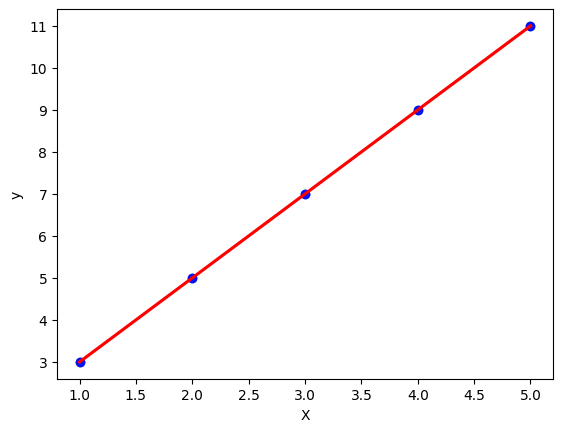

In [9]:
X = np.array([1,2,3,4,5]).reshape(-1,1) #(5,1)
y = np.array([3,5,7,9,11]).reshape(-1,1) #(5,1)

plt.scatter(X,y)
pd_X = pd.DataFrame(X, columns=['X'])
pd_y = pd.DataFrame(y, columns=['y'])
pd_df = pd.concat([pd_X,pd_y],axis=1)
sns.regplot(data=pd_df, x='X', y='y', line_kws={'color':'red'}, scatter_kws={'color':'blue'})

## 단순 선형회귀

In [29]:
# 학습률
learning_rate = 0.01

X = np.array([1,2,3,4,5]).reshape(-1,1) # (5,1)
y = np.array([3,5,7,9,11]).reshape(-1,1)
W = np.zeros((1,1)) # 기울기 0으로 초기화 #[[0.]]
b = np.zeros((1,1)) # 절편 0으로 초기화 #[[0.]]

def linear_forward(X,y,W,b):
  y_pred=np.dot(X,W.T)+b
  cost=np.sum(np.square(y-y_pred))/len(y)
  return y_pred, cost

y_pred, cost = linear_forward(X,y,W,b)
print('=======학습 전=======')
print('W:{},b:{},cost:{}'.format(W,b,cost))

def loss_gradient(X,y,W,b):
  N = len(y)
  # 가설함수(hypersis function) : y예측값을 구하는 함수
  # y_pred = WX+b
  y_pred = np.dot(X,W)+b
  # print(y_pred)
  # print('W.shape:{} b.shape:{}'.format(W.shape,b.shape))

  # w : -x(y-y_pred), b:-1(y-y_pred)

  # 오차(Error)
  # error = y-y_pred

  # 편미분
  de_W = -1*np.dot(X.T,y-y_pred) # -x(y-y_pred)

  # b_factors = np.ones((N,1))
  # de_b = -1*np.dot(b_factors.T, y-y_pred) # -(y-y_pred)
  de_b = -1*np.sum(y-y_pred, axis=0) # 행끼리 다 더하기.

  de_W = 1/len(y)*de_W # MSE
  de_b = 1/len(y)*de_b # MSE

  return de_W, de_b

for i in range(100):
  de_W, de_b = loss_gradient(X,y,W,b)
  # 경사 하강법 적용하기.
  W = W-learning_rate*de_W
  b = b-learning_rate*de_b

y_pred, cost = linear_forward(X,y,W,b)
print('=======학습 후=======')
print('W:{},b:{},cost:{}'.format(W,b,cost))

=======학습 전=======
W:[[0.]],b:[[0.]],cost:57.0
=======학습 후=======
W:[[2.09687392]],b:[[0.65022646]],cost:0.02226804533208234


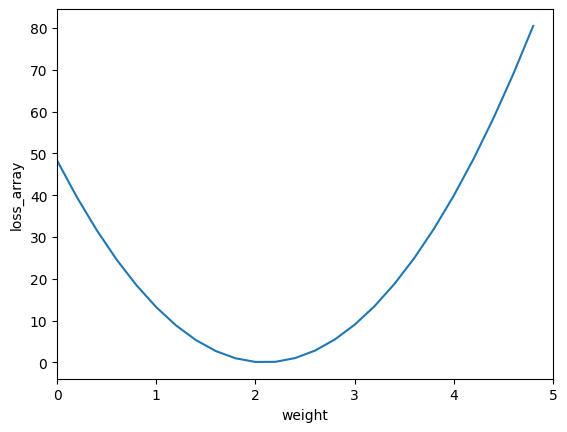

In [30]:
weights = np.arange(0,5,0.2)

loss_array = []
for weight in weights:
  _, loss = linear_forward(X,y,weight,b)
  loss_array.append(loss)

fig = plt.figure()
ax = plt.axes(xlim=(0,5))
ax.plot(weights, loss_array)
ax.set_xlabel('weight')
ax.set_ylabel('loss_array')
plt.show()

In [32]:
def predict(test):
  return W*test+b

predict(7)

array([[15.32834388]])

### 다중선형회귀(Multivariate Linear Regression)
- 변수(feature)가 2개 이상인 데이터의 결과를 예측하는것

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<ipython-input-49-2abd32f44415>:58: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  redDot.set_data(frame, loss)


[11146.494690861959, 9827.699305355598, 8594.423919849241, 7446.668534342881, 6384.433148836522, 5407.7177633301635, 4516.522377823804, 3710.846992317443, 2990.691606811084, 2356.056221304724, 1806.9408357983655, 1343.3454502920063, 965.270064785646, 672.7146792792859, 465.67929377292677, 344.16390826656647, 308.16852276020677, 357.6931372538467, 492.73775174748687, 713.3023662411272, 1019.386980734767, 1410.9915952284073, 1888.1162097220451, 2450.7608242156844, 3098.9254387093274, 3832.610053202967, 4651.814667696608, 5556.539282190243, 6546.783896683884, 7622.548511177522, 8783.833125671163, 10030.637740164802, 11362.962354658444, 12780.806969152083, 14284.171583645724]


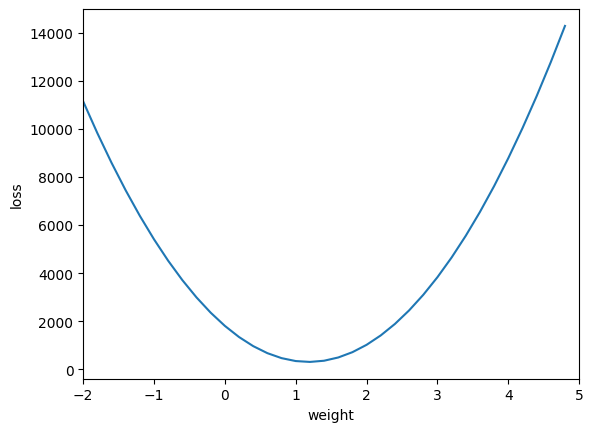

In [49]:
# 학습률
learning_rate = 0.01

X = np.array([[2,4,6,8,10],
              [0,4,2,3,4]]).T # (5,2)
y = np.array([81,93,91,97,98]).reshape(-1,1) # (5,1)

W = np.zeros((2,1)) # 기울기 0으로 초기화
b = np.zeros((1,1)) # 절편 0으로 초기화

def linear_forward_(X,y,W,b):
  y_pred=sum(np.dot(X,W))+b # y_pred = XW = b -> 2,5
  cost = np.sum(np.square(y-y_pred))/len(y)
  return y_pred, cost

def loss_gradient_(X,y,W,b, l1=0.2, l2=0.7):
  y_pred = np.dot(X, W) + b # 가설함수
  de_W = np.dot(X.T, y-y_pred)
  de_b = np.sum(y-y_pred, axis=0)

  # l1,l2 (랏소,릿지) 규제 적용
  de_W = (1/len(y))*de_W+l1*np.sign(W) + l2*W
  de_b = (1/len(y))*de_b

  return de_W, de_b

train_W = []
for i in range(1000):
  de_dW, de_db = loss_gradient_(X,y,W,b)

  #경사하강법 적용하기
  W = W-(-1)*learning_rate*de_dW
  b = b-(-1)*learning_rate*de_db

  train_W.append(W)

# loss_weight 그래프
weights = np.arange(-2,5,0.2)

loss_array_ = []
for weight in weights:
  _, loss = linear_forward(X,y,weight,b)
  loss_array_.append(loss)

fig = plt.figure()
ax = plt.axes(xlim=(-2,5))
ax.plot(weights, loss_array_)
ax.set_xlabel('weight')
ax.set_ylabel('loss')
# plt.show()

# Animation 설정하기.

redDot, = plt.plot([],[],'ro')

def animate(frame):
  _, loss = linear_forward_(X,y,frame,b)
  redDot.set_data(frame, loss)
  return redDot

ani = FuncAnimation(fig, animate, frames=np.array(train_W))
FFWriter = animation.FFMpegWriter(fps=1)
ani.save('animation.mp4', writer = FFWriter)

print(loss_array)